<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

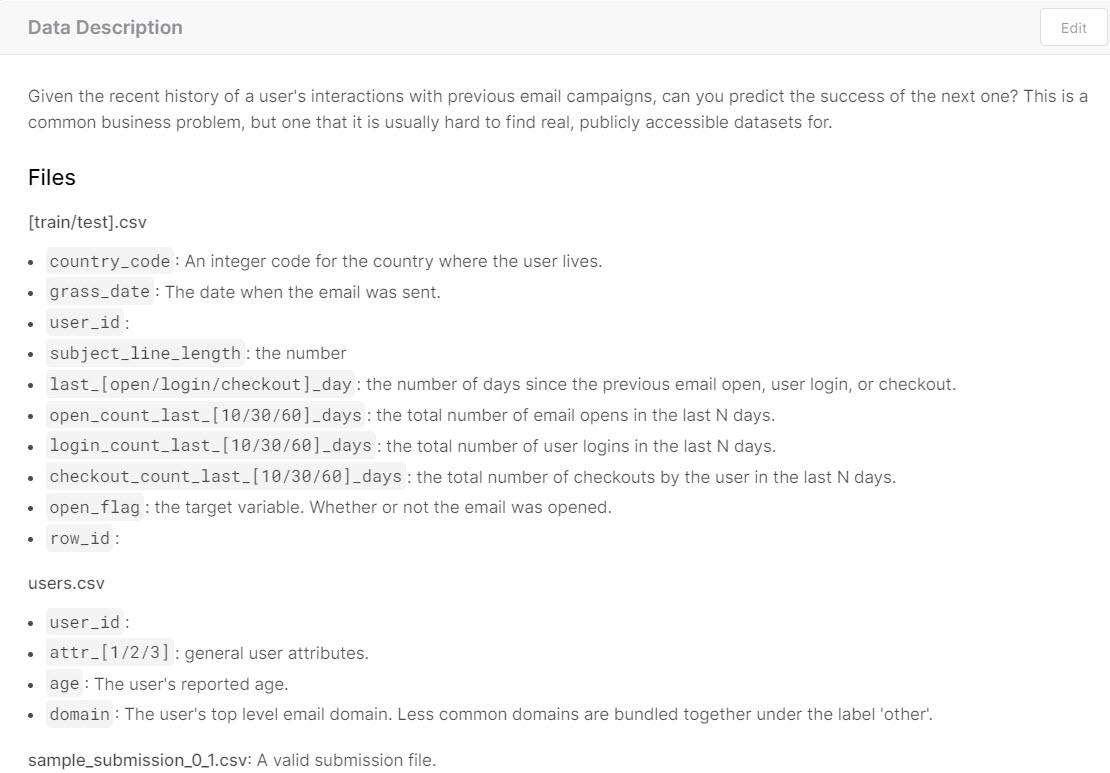

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

# PCA  & LDA Analysis

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## Define Functions

In [2]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

## Reading in the dataset

Reading User data

In [7]:
#Read the csv file 
dataset6_df = pd.read_csv('data/dataset6.csv')

In [8]:
dataset6_df

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,weekday,domain_@gmail.com,domain_@outlook.com,domain_@ymail.com,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_7
0,1,0,35,85,9,2000,0,0,0,17,...,5,0,0,0,0,0,0,0,0,0
1,1,2,64,59,1,3,0,0,1,27,...,5,1,0,0,1,0,0,0,0,0
2,1,1,50,40,9,253,0,0,3,2,...,1,1,0,0,0,0,0,0,0,0
3,1,1,35,2,1,2,1,3,3,31,...,4,0,0,0,0,0,0,0,1,0
4,1,0,40,29,3,6,0,1,2,4,...,4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124161,1,0,49,2,21,2000,1,4,4,0,...,5,1,0,0,1,0,0,0,0,0
124162,1,0,41,22,3,27,0,2,4,0,...,4,1,0,0,0,1,0,0,0,0
124163,1,0,38,20,5,2000,0,3,7,0,...,0,1,0,0,0,0,1,0,0,0
124164,0,0,47,1000,7,2000,0,0,0,0,...,6,1,0,0,1,0,0,0,0,0


In [9]:
dataset6_df.shape

(124166, 26)

In [10]:
dataset6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124166 entries, 0 to 124165
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   attr_2                       124166 non-null  int64
 1   attr_3                       124166 non-null  int64
 2   subject_line_length          124166 non-null  int64
 3   last_open_day                124166 non-null  int64
 4   last_login_day               124166 non-null  int64
 5   last_checkout_day            124166 non-null  int64
 6   open_count_last_10_days      124166 non-null  int64
 7   open_count_last_30_days      124166 non-null  int64
 8   open_count_last_60_days      124166 non-null  int64
 9   login_count_last_10_days     124166 non-null  int64
 10  login_count_last_30_days     124166 non-null  int64
 11  login_count_last_60_days     124166 non-null  int64
 12  checkout_count_last_10_days  124166 non-null  int64
 13  checkout_count_last_30_days  

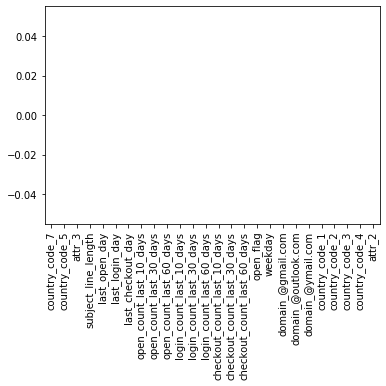

In [11]:
dataset6_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

### Train-test split dataset

reading trainng data

In [12]:
X = dataset6_df.drop(['open_flag'], axis=1)
y = dataset6_df['open_flag']

In [13]:
X.shape

(124166, 25)

In [14]:
y.shape

(124166,)

In [15]:
features = list(X)
features

['attr_2',
 'attr_3',
 'subject_line_length',
 'last_open_day',
 'last_login_day',
 'last_checkout_day',
 'open_count_last_10_days',
 'open_count_last_30_days',
 'open_count_last_60_days',
 'login_count_last_10_days',
 'login_count_last_30_days',
 'login_count_last_60_days',
 'checkout_count_last_10_days',
 'checkout_count_last_30_days',
 'checkout_count_last_60_days',
 'weekday',
 'domain_@gmail.com',
 'domain_@outlook.com',
 'domain_@ymail.com',
 'country_code_1',
 'country_code_2',
 'country_code_3',
 'country_code_4',
 'country_code_5',
 'country_code_7']

In [16]:
len(features)

25

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [18]:
X_train.shape

(100574, 25)

In [19]:
X_train.columns

Index(['attr_2', 'attr_3', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'weekday',
       'domain_@gmail.com', 'domain_@outlook.com', 'domain_@ymail.com',
       'country_code_1', 'country_code_2', 'country_code_3', 'country_code_4',
       'country_code_5', 'country_code_7'],
      dtype='object')

In [20]:
X_val.shape

(11175, 25)

In [21]:
X_test.shape

(12417, 25)

#### Check for Co-relation

In [22]:
# correlation matrix (before stdze)
corr = X_train.corr()
print('Corelation Matrix:\n',X_train.corr())

Corelation Matrix:
                                attr_2    attr_3  subject_line_length  \
attr_2                       1.000000 -0.031541            -0.027670   
attr_3                      -0.031541  1.000000             0.005171   
subject_line_length         -0.027670  0.005171             1.000000   
last_open_day               -0.249823 -0.044867             0.060740   
last_login_day              -0.527497 -0.148818             0.054661   
last_checkout_day            0.024746 -0.339664             0.037856   
open_count_last_10_days      0.051779  0.000237            -0.016528   
open_count_last_30_days      0.056946 -0.000208            -0.030555   
open_count_last_60_days      0.055923  0.006539            -0.035778   
login_count_last_10_days    -0.003309  0.221952            -0.004757   
login_count_last_30_days    -0.003999  0.234190            -0.007525   
login_count_last_60_days    -0.005592  0.244951            -0.010219   
checkout_count_last_10_days  0.003711  0.102

In [23]:
corr.to_csv('data/X_train_correlation_dataset6.csv')

### Apply standardscalar 

In [24]:
X_train.shape

(100574, 25)

In [25]:
scaler = StandardScaler().fit(X_train)

X_train_col_names = X_train.columns
y_train_col_names = y_train.to_frame().columns
X_val_col_names   = X_val.columns
y_val_col_names   = y_val.to_frame().columns
X_test_col_names  = X_test.columns
y_test_col_names  = y_test.to_frame().columns

X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform (X_val)
X_test_scaled  = scaler.transform (X_test)

#X_train_scaled = pd.DataFrame(X_train_scaled)
#X_val_scaled = pd.DataFrame(X_val_scaled)
#X_test_scaled = pd.DataFrame(X_test_scaled)

from sklearn.externals import joblib
scaler_filename = "dataset6_scaler.save"
joblib.dump(scaler, scaler_filename) 

['dataset6_scaler.save']

In [26]:
X_train_scaled

array([[ 0.08662061, -1.03719824, -0.62890143, ..., -0.38417979,
        -0.30975383, -0.20028936],
       [ 0.08662061, -0.06174307,  0.1797964 , ..., -0.38417979,
        -0.30975383, -0.20028936],
       [ 0.08662061,  0.91371209,  0.89863891, ..., -0.38417979,
        -0.30975383, -0.20028936],
       ...,
       [ 0.08662061, -1.03719824, -2.96513959, ..., -0.38417979,
         3.22837012, -0.20028936],
       [ 0.08662061, -1.03719824, -0.53904612, ..., -0.38417979,
        -0.30975383, -0.20028936],
       [ 0.08662061, -0.06174307, -1.16803331, ..., -0.38417979,
        -0.30975383, -0.20028936]])

In [27]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_val_scaled_df = pd.DataFrame(X_val_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [28]:
X_train_scaled_df.columns = X_train_col_names
X_val_scaled_df.columns = X_train_col_names 
X_test_scaled_df.columns = X_train_col_names

X_val_scaled_df.head()

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,weekday,domain_@gmail.com,domain_@outlook.com,domain_@ymail.com,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_7
0,0.086621,-1.037198,-1.168033,-0.317467,0.219833,1.864512,-0.725871,-0.154000,-0.237207,-0.650879,...,-0.790024,-2.146044,-0.064057,-0.054146,-0.67513,1.966797,-0.461336,-0.38418,-0.309754,-0.200289
1,0.086621,-1.037198,-0.628901,0.779377,-0.177779,1.864512,-0.725871,-0.786914,-0.790687,-0.650879,...,-0.790024,0.465974,-0.064057,-0.054146,-0.67513,1.966797,-0.461336,-0.38418,-0.309754,-0.200289
2,0.086621,-1.037198,0.808784,0.064537,1.856668,1.864512,-0.725871,-0.786914,-0.790687,-0.650879,...,-0.790024,0.465974,-0.064057,-0.054146,-0.67513,-0.508441,2.167618,-0.38418,-0.309754,-0.200289
3,0.086621,1.889167,-1.797021,-0.362854,-0.336823,-0.610418,-0.315830,-0.628685,-0.698441,0.108118,...,-1.283833,0.465974,-0.064057,-0.054146,-0.67513,-0.508441,-0.461336,-0.38418,3.228370,-0.200289
4,0.086621,-1.037198,-0.089770,-0.272080,-0.058495,1.864512,-0.725871,-0.786914,-0.698441,-0.650879,...,1.679021,0.465974,-0.064057,-0.054146,-0.67513,-0.508441,-0.461336,-0.38418,-0.309754,-0.200289


In [29]:
#*******************************************************************************
#                         Save train scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_train_scaled_dataset6.xlsx', engine='xlsxwriter')

X_train_scaled_df.to_excel(writer, sheet_name='X_train_scaled', index = False)
y_train.to_excel(writer, sheet_name='y_train', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [30]:
#*******************************************************************************
#                         Save val scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_val_scaled_dataset6.xlsx', engine='xlsxwriter')

X_val_scaled_df.to_excel(writer, sheet_name='X_val_scaled', index = False)
y_val.to_excel(writer, sheet_name='y_val', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [31]:
#*******************************************************************************
#                         Save test scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_test_scaled_dataset6.xlsx', engine='xlsxwriter')

X_test_scaled_df.to_excel(writer, sheet_name='X_test_scaled', index = False)
y_test.to_excel(writer, sheet_name='y_test', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Applying LDA

In [32]:
# Create and run an LDA
lda = LDA(n_components=None)
X_lda = lda.fit(X_train_scaled, y_train)

In [33]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([1.])

In [34]:
# Run function
select_n_components(lda_var_ratios, 0.95)

1

In [35]:
#  Applying LDA
lda = LDA(n_components=4)
X_train_PDA = lda.fit(X_train_scaled, y_train)

In [36]:
# Show the result of LDA
print("Model Priors:\n",lda.priors_)

Model Priors:
 [0.50015909 0.49984091]


In [37]:
# Get the loadings
scalings = pd.DataFrame(lda.scalings_)
scalings.insert(0,'features',features[0:len(features)])
print("LDA Loadings:\n",scalings)

LDA Loadings:
                        features         0
0                        attr_2 -0.006294
1                        attr_3 -0.032541
2           subject_line_length -0.029443
3                 last_open_day -0.086761
4                last_login_day  0.050014
5             last_checkout_day  0.008254
6       open_count_last_10_days  0.650170
7       open_count_last_30_days  0.289019
8       open_count_last_60_days  0.186968
9      login_count_last_10_days  0.143106
10     login_count_last_30_days -0.029704
11     login_count_last_60_days -0.139495
12  checkout_count_last_10_days -0.012278
13  checkout_count_last_30_days  0.051255
14  checkout_count_last_60_days -0.030847
15                      weekday -0.077806
16            domain_@gmail.com -0.025564
17          domain_@outlook.com -0.030435
18            domain_@ymail.com  0.024845
19               country_code_1 -0.210170
20               country_code_2 -0.013669
21               country_code_3 -0.159330
22               co

In [38]:
# Saving the LDA Loadings into excel file

# Create a new excel workbook
writer = pd.ExcelWriter('data/LDA_Loadings_dataset6.xlsx', engine='xlsxwriter')

scalings.to_excel(writer, sheet_name='LDA Loadings', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [39]:
# Get the Eigenvectors
coeff= pd.DataFrame(np.transpose(lda.coef_))
coeff.insert(0,'features',features[0:len(features)])
print("\nLDA Coefficients:\n",coeff)


LDA Coefficients:
                        features         0
0                        attr_2 -0.009207
1                        attr_3 -0.047605
2           subject_line_length -0.043073
3                 last_open_day -0.126924
4                last_login_day  0.073167
5             last_checkout_day  0.012075
6       open_count_last_10_days  0.951148
7       open_count_last_30_days  0.422813
8       open_count_last_60_days  0.273520
9      login_count_last_10_days  0.209353
10     login_count_last_30_days -0.043455
11     login_count_last_60_days -0.204070
12  checkout_count_last_10_days -0.017962
13  checkout_count_last_30_days  0.074982
14  checkout_count_last_60_days -0.045126
15                      weekday -0.113824
16            domain_@gmail.com -0.037398
17          domain_@outlook.com -0.044525
18            domain_@ymail.com  0.036346
19               country_code_1 -0.307463
20               country_code_2 -0.019996
21               country_code_3 -0.233088
22            

In [40]:
# Apply LDA on the Testset
from sklearn.metrics import confusion_matrix, classification_report, precision_score

pred=lda.predict(X_test)
print(np.unique(pred, return_counts=True))
print("\nConfusion Matrix:\n", confusion_matrix(pred, y_test))
print('\n')
print(classification_report(y_test, pred, digits=3))

(array([0, 1], dtype=int64), array([7082, 5335], dtype=int64))

Confusion Matrix:
 [[4328 2754]
 [1899 3436]]


              precision    recall  f1-score   support

           0      0.611     0.695     0.650      6227
           1      0.644     0.555     0.596      6190

    accuracy                          0.625     12417
   macro avg      0.628     0.625     0.623     12417
weighted avg      0.628     0.625     0.623     12417



### Applying PCA

In [41]:
colnames = np.transpose(features)
n_components = len(features)
pca = PCA(n_components).fit(X_train_scaled)
X_train_PCA = pca.transform(X_train_scaled)

In [42]:
pca_data_org = pd.DataFrame(X_train_PCA)
pca_data_org

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.082304,1.287546,-0.199278,-0.625571,-0.247524,1.740002,1.038019,1.587750,1.589534,-1.793459,...,-0.025286,-0.092603,0.713290,0.177764,1.312795,0.061893,-0.199466,0.072068,-0.112703,0.114047
1,0.319749,-0.490393,-0.836921,0.960804,-0.222799,-0.134624,0.249051,0.206888,-0.995640,0.798453,...,-0.254494,0.731280,-0.076430,-0.639060,0.176553,-0.496096,-0.078422,-0.059737,0.295126,-0.046402
2,0.076104,-0.143870,-0.379176,0.634796,-0.714915,-1.720278,-0.621920,0.082731,1.835543,-0.557502,...,1.166078,-0.938308,1.050408,0.003226,-0.161850,0.054129,0.017671,0.004222,-0.291381,0.075293
3,-0.355633,-1.502415,-0.834482,0.694639,0.239536,-0.055905,0.253857,0.085695,-1.073331,0.637873,...,-0.259394,1.045292,-0.161250,0.300789,-0.124298,-0.138420,-0.022912,-0.150470,0.018795,-0.032746
4,-1.770716,2.376471,1.342258,0.596902,0.063443,-1.734237,-0.550537,1.163421,0.710417,-0.201828,...,0.446919,-0.016633,0.106478,0.086834,0.489506,-0.036971,-0.076447,-0.021297,-0.287715,0.034645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100569,7.204394,-1.631741,-3.524897,-0.725371,-4.605027,-0.546076,3.038121,0.552897,4.089628,-0.079376,...,-0.092674,-1.563708,0.038186,-0.098810,0.154147,0.629901,0.139137,0.078613,0.047373,0.031951
100570,1.592213,0.703630,-0.212298,-0.607436,0.961577,0.204903,1.568201,-0.882647,0.215641,-1.174127,...,0.285481,0.553368,-0.045379,-0.411440,0.531771,-0.001146,-0.072125,-0.118614,0.050414,-0.011628
100571,-0.168013,-1.189437,-0.904282,-3.024813,2.656989,-0.749440,0.063085,1.659436,-0.702821,1.212149,...,-0.350711,0.674175,-0.005745,-0.296132,-0.015928,-0.114553,-0.061261,-0.263144,0.028980,0.004669
100572,-1.341846,-0.546924,-0.241104,-0.198845,0.753676,0.056469,-0.084602,-0.034164,-0.302738,-0.427657,...,-0.913935,0.471390,-0.085116,-0.078161,-0.282036,-0.023206,1.085096,-0.012385,0.060821,-0.031809


In [43]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_
pca_eigenVal_var = pd.DataFrame(eigval,index=PCs)
pca_eigenVal_var

,0
PC1,4.307330
PC2,3.008095
PC3,1.806342
PC4,1.696485
PC5,1.608374
PC6,1.346274
PC7,1.204519
PC8,1.149183
PC9,1.135522
PC10,1.066586


In [44]:
X_train_PCA = pd.DataFrame(X_train_PCA,columns=PCs)
X_train_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.082304,1.287546,-0.199278,-0.625571,-0.247524,1.740002,1.038019,1.587750,1.589534,-1.793459,...,-0.025286,-0.092603,0.713290,0.177764,1.312795,0.061893,-0.199466,0.072068,-0.112703,0.114047
1,0.319749,-0.490393,-0.836921,0.960804,-0.222799,-0.134624,0.249051,0.206888,-0.995640,0.798453,...,-0.254494,0.731280,-0.076430,-0.639060,0.176553,-0.496096,-0.078422,-0.059737,0.295126,-0.046402
2,0.076104,-0.143870,-0.379176,0.634796,-0.714915,-1.720278,-0.621920,0.082731,1.835543,-0.557502,...,1.166078,-0.938308,1.050408,0.003226,-0.161850,0.054129,0.017671,0.004222,-0.291381,0.075293
3,-0.355633,-1.502415,-0.834482,0.694639,0.239536,-0.055905,0.253857,0.085695,-1.073331,0.637873,...,-0.259394,1.045292,-0.161250,0.300789,-0.124298,-0.138420,-0.022912,-0.150470,0.018795,-0.032746
4,-1.770716,2.376471,1.342258,0.596902,0.063443,-1.734237,-0.550537,1.163421,0.710417,-0.201828,...,0.446919,-0.016633,0.106478,0.086834,0.489506,-0.036971,-0.076447,-0.021297,-0.287715,0.034645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100569,7.204394,-1.631741,-3.524897,-0.725371,-4.605027,-0.546076,3.038121,0.552897,4.089628,-0.079376,...,-0.092674,-1.563708,0.038186,-0.098810,0.154147,0.629901,0.139137,0.078613,0.047373,0.031951
100570,1.592213,0.703630,-0.212298,-0.607436,0.961577,0.204903,1.568201,-0.882647,0.215641,-1.174127,...,0.285481,0.553368,-0.045379,-0.411440,0.531771,-0.001146,-0.072125,-0.118614,0.050414,-0.011628
100571,-0.168013,-1.189437,-0.904282,-3.024813,2.656989,-0.749440,0.063085,1.659436,-0.702821,1.212149,...,-0.350711,0.674175,-0.005745,-0.296132,-0.015928,-0.114553,-0.061261,-0.263144,0.028980,0.004669
100572,-1.341846,-0.546924,-0.241104,-0.198845,0.753676,0.056469,-0.084602,-0.034164,-0.302738,-0.427657,...,-0.913935,0.471390,-0.085116,-0.078161,-0.282036,-0.023206,1.085096,-0.012385,0.060821,-0.031809


In [45]:
pca

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
print('Loading Matrix:'); loadings= np.sqrt(eigval)*eigvec
print(pd.DataFrame(loadings,columns=PCs,index=features),'\n')
Loadings = pd.DataFrame(loadings,columns=PCs,index=features)

Loading Matrix:
                                  PC1       PC2       PC3       PC4       PC5  \
attr_2                       0.058090  0.148469 -0.502163  0.334630  0.520599   
attr_3                       0.319091 -0.048282 -0.234055 -0.101022 -0.101242   
subject_line_length         -0.016366 -0.097932  0.127714  0.653643 -0.371282   
last_open_day               -0.168642 -0.379756  0.295188 -0.064466 -0.171788   
last_login_day              -0.292040 -0.080785  0.571138 -0.177382 -0.398604   
last_checkout_day           -0.447108 -0.005530  0.251950  0.195763 -0.022226   
open_count_last_10_days      0.167041  0.894315  0.082194  0.058675 -0.108497   
open_count_last_30_days      0.169806  0.944077  0.087333  0.057567 -0.103407   
open_count_last_60_days      0.174024  0.922813  0.078023  0.052895 -0.096028   
login_count_last_10_days     0.828379 -0.094192 -0.202784 -0.098944 -0.312268   
login_count_last_30_days     0.852529 -0.094286 -0.219126 -0.104738 -0.323027   
login_count_

In [47]:
# (7) Print out Eigenvectors
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=features),'\n')
EigenVectors = pd.DataFrame(eigvec,columns=PCs,index=features)


Eigenvectors (Linear Coefficients):
                                  PC1       PC2       PC3       PC4       PC5  \
attr_2                       0.027989  0.085603 -0.373633  0.256916  0.410497   
attr_3                       0.153749 -0.027838 -0.174148 -0.077560 -0.079830   
subject_line_length         -0.007886 -0.056465  0.095025  0.501840 -0.292759   
last_open_day               -0.081257 -0.218957  0.219634 -0.049495 -0.135456   
last_login_day              -0.140715 -0.046578  0.424953 -0.136186 -0.314302   
last_checkout_day           -0.215431 -0.003189  0.187463  0.150299 -0.017525   
open_count_last_10_days      0.080486  0.515637  0.061156  0.045048 -0.085551   
open_count_last_30_days      0.081818  0.544329  0.064980  0.044198 -0.081537   
open_count_last_60_days      0.083850  0.532069  0.058053  0.040611 -0.075719   
login_count_last_10_days     0.399140 -0.054308 -0.150881 -0.075965 -0.246226   
login_count_last_30_days     0.410776 -0.054363 -0.163040 -0.080414 -0.2

In [48]:
var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 20 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')

Eigenvalues   : [4.3073302  3.00809519 1.80634163 1.69648538 1.6083739  1.34627407
 1.20451892 1.14918288 1.13552223 1.06658607 1.01783376 1.00523088
 0.93717874 0.79517084 0.69961383 0.64044619 0.50140831 0.37206865
 0.26478971 0.17403662]
%Explained_Var: [17.2291495  12.03226114  7.22529467  6.78587404  6.43343165  5.38504274
  4.81802776  4.5966858   4.54204375  4.26630185  4.07129458  4.02088353
  3.7486777   3.18065174  2.79842749  2.56175929  2.00561332  1.4882598
  1.05914829  0.69613955]
%Cumulative   : [17.2291495  29.26141064 36.48670531 43.27257935 49.706011   55.09105373
 59.90908149 64.50576729 69.04781104 73.31411288 77.38540746 81.40629099
 85.1549687  88.33562044 91.13404794 93.69580723 95.70142055 97.18968034
 98.24882863 98.94496819]




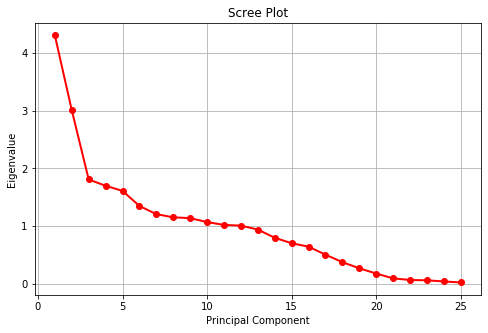

In [49]:
## (9) scree plot
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(); plt.show()


In [50]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.17229149, 0.12032261, 0.07225295, 0.06785874, 0.06433432,
       0.05385043, 0.04818028, 0.04596686, 0.04542044, 0.04266302,
       0.04071295, 0.04020884, 0.03748678, 0.03180652, 0.02798427,
       0.02561759, 0.02005613, 0.0148826 , 0.01059148, 0.0069614 ,
       0.00360496, 0.00247788, 0.00225648, 0.00144575, 0.00076525])

<h3>Save all PCA and LDA Results to excel file<h3>

In [51]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Loadings_dataset6.xlsx', engine='xlsxwriter')

pca_eigenVal_var.to_excel(writer, sheet_name='pca_eigenVal_var')
Loadings.to_excel(writer, sheet_name='Loadings')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [52]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_EigenVectors_dataset6.xlsx', engine='xlsxwriter')

EigenVectors.to_excel(writer, sheet_name='EigenVectors')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [53]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Data_dataset6.xlsx', engine='xlsxwriter')

X_train_PCA.to_excel(writer, sheet_name='PCA Data', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()